<a href="https://colab.research.google.com/github/GoTudering/Final_Project_MTH3033/blob/main/MTH3033_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils import data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from tqdm import tqdm
import numpy as np
from glob import glob
import cv2
from google. colab.patches import cv2_imshow

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

#Lenet

#parameter
learning_rate = 0.001
, training_epochs = 30
, batch_size = 100
, [Epoch:   30] cost = 0.323462397
, Accuracy: 0.8366000056266785

In [ ]:
# parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 100

In [ ]:
Fashion_mnist_train = datasets.FashionMNIST(root='FashionMNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

Fashion_mnist_test = datasets.FashionMNIST(root='FashionMNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting FashionMNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST_data/FashionMNIST/raw



In [ ]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=Fashion_mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [ ]:
#Lenet Model
class Lenet(torch.nn.Module):

    def __init__(self):
        super(Lenet, self).__init__()
        self.keep_prob = 0.5 # for dropout
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 6)
        #    Pool     -> (?, 14, 14, 6)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        # L2 ImgIn shape=(?, 14, 14, 6)
        #    Conv      ->(?, 10, 10, 16)
        #    Pool      ->(?, 5, 5, 16)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16, kernel_size=5, stride=1),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(kernel_size=2, stride=2))
        # L3 ImgIn shape=(?, 5, 5, 16)
        #    Conv      ->(?, 1, 1, 120)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(16, 120, kernel_size=5, stride=1),
            torch.nn.Sigmoid(),
            torch.nn.AvgPool2d(1,stride = 1))

        # L4 FC 1x1x120 inputs -> 84 outputs
        self.fc1 = torch.nn.Linear(1 * 1 * 120, 84, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.Sigmoid(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        # L5 Final FC 84 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(84, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 2.15115261
[Epoch:    2] cost = 0.877756238
[Epoch:    3] cost = 0.685352385
[Epoch:    4] cost = 0.604842961
[Epoch:    5] cost = 0.554653704
[Epoch:    6] cost = 0.520786762
[Epoch:    7] cost = 0.497597098
[Epoch:    8] cost = 0.473749846
[Epoch:    9] cost = 0.458807617
[Epoch:   10] cost = 0.442183405
[Epoch:   11] cost = 0.428528875
[Epoch:   12] cost = 0.415935874
[Epoch:   13] cost = 0.404099941
[Epoch:   14] cost = 0.394946814
[Epoch:   15] cost = 0.387440622
[Epoch:   16] cost = 0.377506882
[Epoch:   17] cost = 0.374180824
[Epoch:   18] cost = 0.366705507
[Epoch:   19] cost = 0.360116184
[Epoch:   20] cost = 0.354147017
[Epoch:   21] cost = 0.349397659
[Epoch:   22] cost = 0.346335948
[Epoch:   23] cost = 0.341950327
[Epoch:   24] cost = 0.336171895
[Epoch:   25] cost = 0.332300454
[Epoch:   26] cost = 0.328953862
[Epoch:   27] cost = 0.325327694
[Epoch:   28] cost = 0.321541935
[Epoch:   29] cost = 0.319386274
[Epoch:

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.8/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.8366000056266785


#New parameter
learning_rate = 0.0001
, training_epochs = 30
, batch_size = 100
, [Epoch:   30] cost = 0.623933136
, Accuracy: 0.5525999665260315

In [ ]:
# parameters
learning_rate = 0.0001
training_epochs = 30
batch_size = 100

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 2.39469671
[Epoch:    2] cost = 2.31946349
[Epoch:    3] cost = 2.30897331
[Epoch:    4] cost = 2.30618596
[Epoch:    5] cost = 2.30424809
[Epoch:    6] cost = 2.2460444
[Epoch:    7] cost = 1.54393065
[Epoch:    8] cost = 1.2250427
[Epoch:    9] cost = 1.09752846
[Epoch:   10] cost = 1.01866412
[Epoch:   11] cost = 0.960630774
[Epoch:   12] cost = 0.913552523
[Epoch:   13] cost = 0.876106977
[Epoch:   14] cost = 0.8450194
[Epoch:   15] cost = 0.819303393
[Epoch:   16] cost = 0.793267488
[Epoch:   17] cost = 0.775165677
[Epoch:   18] cost = 0.758197784
[Epoch:   19] cost = 0.740191519
[Epoch:   20] cost = 0.728469074
[Epoch:   21] cost = 0.718380749
[Epoch:   22] cost = 0.703110218
[Epoch:   23] cost = 0.695911288
[Epoch:   24] cost = 0.685301125
[Epoch:   25] cost = 0.680478394
[Epoch:   26] cost = 0.670229852
[Epoch:   27] cost = 0.663645208
[Epoch:   28] cost = 0.656231165
[Epoch:   29] cost = 0.647695303
[Epoch:   30] cost =

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.5497999787330627


# parameters
learning_rate = 0.01
, training_epochs = 30
, batch_size = 100
, [Epoch:   30] cost = 0.231829226
, Accuracy: 0.8578999638557434

In [ ]:
# parameters
learning_rate = 0.01
training_epochs = 30
batch_size = 100

In [ ]:
# instantiate Lenet model
model = Lenet().to(device)

In [ ]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 2.30756021
[Epoch:    2] cost = 2.30356026
[Epoch:    3] cost = 2.30345726
[Epoch:    4] cost = 2.30349779
[Epoch:    5] cost = 2.30339789
[Epoch:    6] cost = 2.3034389
[Epoch:    7] cost = 2.30355382
[Epoch:    8] cost = 2.30342555
[Epoch:    9] cost = 2.30328703
[Epoch:   10] cost = 2.30342317
[Epoch:   11] cost = 2.30323267
[Epoch:   12] cost = 2.30350018
[Epoch:   13] cost = 2.30343294
[Epoch:   14] cost = 1.59471321
[Epoch:   15] cost = 0.688804567
[Epoch:   16] cost = 0.564084053
[Epoch:   17] cost = 0.513332903
[Epoch:   18] cost = 0.484860986
[Epoch:   19] cost = 0.456578344
[Epoch:   20] cost = 0.44325164
[Epoch:   21] cost = 0.426948994
[Epoch:   22] cost = 0.412489414
[Epoch:   23] cost = 0.400728256
[Epoch:   24] cost = 0.393638879
[Epoch:   25] cost = 0.380829006
[Epoch:   26] cost = 0.378961533
[Epoch:   27] cost = 0.36959669
[Epoch:   28] cost = 0.365866542
[Epoch:   29] cost = 0.359225631
[Epoch:   30] cost = 0.

In [ ]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = Fashion_mnist_test.test_data.view(len(Fashion_mnist_test), 1, 28, 28).float().to(device)
    Y_test = Fashion_mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.8227999806404114


#Alexnet

Mean Time (per epoch): 02:01:54


Acc: 0.9079

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

CHECKPOINTS_DIR = './Alexmodels'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

다음 링크를 다운 받아 Alexmodels 디렉터리에 넣어주시기 바랍니다.

https://drive.google.com/file/d/1A5hiM3fKj6ccd8tnE_xQ4rvQJi-_zeGk/view?usp=share_link

한 Epoch 당 Colab으로 2시간이 걸려 지인의 RTX 4090 GPU를 빌려 학습을 수행하였습니다.

해당 GPU로 돌리니 한 Epoch 당 20초밖에 걸리지 않아 충분한 횟수의 학습을 진행하였습니다.

이를 통해 얻은 최선의 가중치 결과 파일을 첨부하였습니다.

In [ ]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                std=[0.229, 0.224, 0.225])
to_rgb = transforms.Lambda(lambda image: image.convert('RGB'))
resize = transforms.Resize((224, 224))
oh_my_eyes_transform = transforms.Compose([resize, to_rgb, transforms.ToTensor(), normalize])

train_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                  train=True,
                                  transform=oh_my_eyes_transform,
                                  download=True)
test_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                 train=False,
                                 transform=oh_my_eyes_transform,
                                 download=True)

In [ ]:
class AlexNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        num_classes: int = 1000
        dropout: float = 0.5

        # Input: (N, 3, 224, 224)
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=0),  # (N, 54, 54, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 26, 26, 96)
            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),  # (N, 26, 26, 256)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 12, 12, 256)
            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),  # (N, 12, 12, 384)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 5, 5, 256)
        ) # Output: (N, 256)

        # Input: (N, 256)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 5 * 5, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        ) # Output: (N, 1000)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 5 * 5 * 256)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = AlexNet()
# print(summary(model, torch.zeros((1, 3, 224, 224))))
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

Seed: 777


In [ ]:
print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"alexnet_states_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)

In [ ]:
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'alexnet_states_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    print(model_path)
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = AlexNet()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records)    

./Alexmodels/alexnet_states_e0024.pkl


  1%|3                                       | 79/10000 [00:21<44:12,  3.74it/s]

Epoch: 24 	Acc: 9079/10000
[{'epoch': 24, 'correct': 9079, 'path': './Alexmodels/alexnet_states_e0024.pkl'}]


#Simplyifing Alexnet

In [ ]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

In [ ]:
train_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                  train=True,
                                  transform=transforms.ToTensor(),
                                  download=True)
test_set = datasets.FashionMNIST(root='FashionMNIST_data/',
                                 train=False,
                                 transform=transforms.ToTensor(),
                                 download=True)

#Simplified Alexnet 1

Mean Time (per epoch): 00:02:30

Arr: 0.8830

In [ ]:
CHECKPOINTS_DIR = './SAlexmodels.1'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

In [ ]:
class SAlexNet1(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        num_classes: int = 100
        dropout: float = 0.5

        # Input: (N, 1, 28, 28)
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=6, stride=2, padding=0),  # (N, 12, 12, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=5, stride=1, padding=0),  # (N, 8, 8, 32)
            nn.Conv2d(32, 96, kernel_size=5, stride=1, padding=2),  # (N, 8, 8, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=1, padding=0),  # (N, 5, 5, 32)
            nn.Conv2d(96, 128, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 128)
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 128)
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 96, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 96)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 2, 2, 96)
        ) # Output: (N, 2, 2, 96)

        # Input: (N, 2, 2, 96)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(96 * 2 * 2, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(256, 256),
            nn.ReLU(inplace=True),
            nn.Linear(256, num_classes),
        ) # Output: (N, 100)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 2 * 2 * 96)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = SAlexNet1()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"salexnet_states1_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'salexnet_states1_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = SAlexNet1()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records[0])    

#Simplified Alexnet 2

Mean Time (per epoch): 00:01:15


Arr: 0.8770




In [ ]:
CHECKPOINTS_DIR = './Salexmodels.2'
os.makedirs(CHECKPOINTS_DIR, exist_ok=True)

In [ ]:
class SAlexNet2(nn.Module):
    def __init__(self) -> None:
        super().__init__()

        num_classes: int = 100
        dropout: float = 0.5

        # Input: (N, 1, 28, 28)
        self.features = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=6, stride=2, padding=0),  # (N, 12, 12, 16)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=5, stride=1, padding=0),  # (N, 8, 8, 16)
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),  # (N, 8, 8, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=4, stride=1, padding=0),  # (N, 5, 5, 32)
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 64)
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 64)
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 32, kernel_size=3, stride=1, padding=1),  # (N, 5, 5, 32)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=0),  # (N, 2, 2, 32)
        ) # Output: (N, 32)

        # Input: (N, 32)
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(32 * 2 * 2, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(512, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes),
        ) # Output: (N, 100)

    def _initialize(self):
        for layer in self.features:
            if isinstance(layer, nn.Conv2d):
                nn.init.normal_(layer.weigh, mean=0, std=0.01)
                nn.init.constant_(layer.bias, 0)
        for i in (3, 8, 10):
            nn.init.constant_(self.features[i].bias, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = x.view(-1, 2 * 2 * 32)
        x = self.classifier(x)
        return x

In [ ]:
seed = torch.initial_seed()
print(f"Seed: {seed}")

model = SAlexNet2()
model = model.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001, betas=(0.9, 0.999))
lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)
train_loader = data.DataLoader(train_set, shuffle=True,
                               pin_memory=True, num_workers=2,
                               drop_last=True, batch_size=BATCH_SIZE)

print("Start training...")
total_steps = 1
for epoch in range(NUM_EPOCHS):
    pbar = tqdm(train_loader, ascii=True, ncols=80)
    loss_records = []
    for imgs, classes in pbar:
        imgs, classes = imgs.to(device), classes.to(device)

        # Calculate the loss
        output = model(imgs)
        loss = F.cross_entropy(output, classes)

        # Update the parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_records.append(loss.item())

        # Log
#         if total_steps % 50 == 0:
#             with torch.no_grad():
#                 model.eval()
#                 _, preds = torch.max(output, 1)
#                 accuracy = torch.sum(preds == classes)

#                 print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss.item():.4f} \tAcc: {accuracy.item()}/{BATCH_SIZE}")
#                 model.train()
        total_steps += 1
    loss_mean = np.mean(loss_records)
    print(f"Epoch: {epoch + 1} \tStep: {total_steps} \tLoss: {loss_mean:.4f}")
    lr_scheduler.step()

    checkpoint_path = os.path.join(CHECKPOINTS_DIR, f"salexnet_states2_e{epoch + 1:04d}.pkl")
    state = {
        'epoch': epoch,
        'total_steps': total_steps,
        'optimizer': optimizer.state_dict(),
        'model': model.state_dict(),
        'seed': seed,
    }
    torch.save(state, checkpoint_path)

In [ ]:
test_loader = data.DataLoader(test_set, shuffle=True,
                              pin_memory=True, num_workers=2,
                              batch_size=BATCH_SIZE)
model_paths = glob(os.path.join(CHECKPOINTS_DIR, 'salexnet_states2_e????.pkl'))
model_paths.sort()

accuracy_records = []

for model_path in model_paths:
    chk = torch.load(model_path)
    epoch = chk['epoch']
    
    model = SAlexNet2()
    model.load_state_dict(chk['model'])  # Load parameters from the checkpoint
    model = model.to(device)
  
    correct_coutner = 0
    pbar = tqdm(test_loader, ascii=True, ncols=80, total=len(test_set))
    for imgs, labels in pbar:
        imgs, labels = imgs.to(device), labels.to(device)
        
        with torch.no_grad():
            output = model(imgs)
            model.eval()
            _, preds = torch.max(output, 1)
            accuracy = torch.sum(preds == labels)
            correct_coutner += accuracy.item()
        pbar.update(BATCH_SIZE)

    print(f"Epoch: {epoch + 1} \tAcc: {correct_coutner}/{len(test_set)}")
    accuracy_records.append(dict(epoch=(epoch + 1), correct = correct_coutner, path=model_path))

accuracy_records.sort(reverse=True, key=lambda x: x['correct'])
print(accuracy_records[0])    

#Architecture

In [ ]:
img='./Alexnet.PNG'
img2='./Salexnet_1.PNG'
img3='./Salexnet_2.PNG'

In [ ]:
im=cv2.imread(img)
im2=cv2.imread(img2)
im3=cv2.imread(img3)

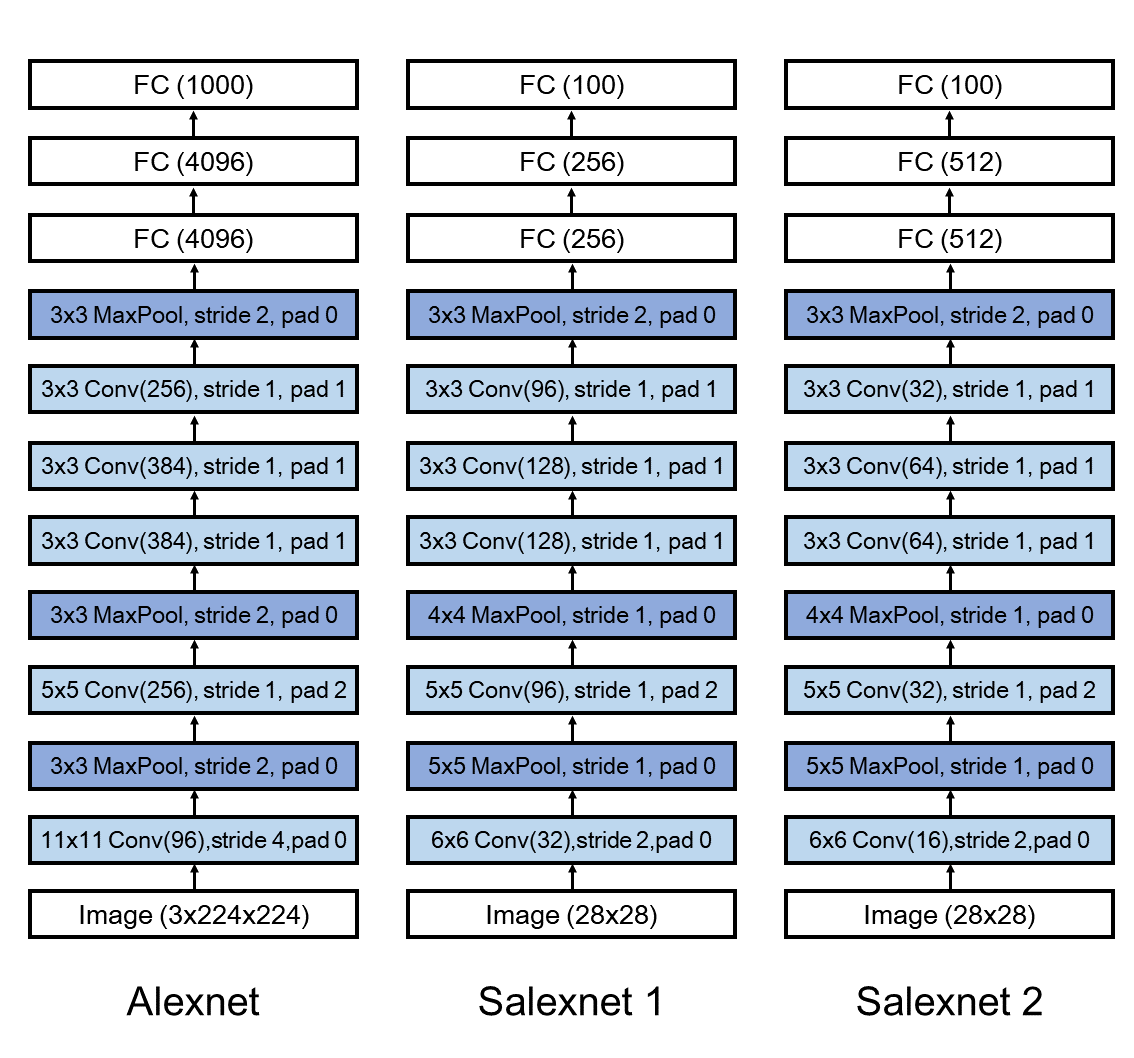

In [ ]:
cv2_imshow(cv2.hconcat([im, im2, im3]))